# import libraries

In [1]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import ast

# load files

In [2]:
df = pd.read_csv('Jobs-scrapping-and-Data-analysis-master/Preprocessed_data2.csv', na_values = 'Nan')
df

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,country
0,machine learning,Neural Magic,Neural Magic is an early-stage AI software com...,onsite,NaN,"Somerville, MA","[{'Seniority level': 'Associate'}, {'Employmen...",2023-02-19,https://www.linkedin.com/jobs/view/machine-lea...,usa
1,machine learning,Neural Magic,Neural Magic is an early-stage AI software com...,onsite,NaN,"Somerville, MA","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2023-03-08,https://www.linkedin.com/jobs/view/machine-lea...,usa
2,machine learning,Verneek,Do you want to be part of the core team for bu...,onsite,NaN,"New York, United States","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2023-02-27,https://www.linkedin.com/jobs/view/machine-lea...,usa
3,machine learning,Yakoa,We’re looking for people who want to build for...,onsite,NaN,"San Francisco, CA","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2023-03-11,https://www.linkedin.com/jobs/view/machine-lea...,usa
4,machine learning,"Chemix, Inc.",Chemix is seeking a highly-motivated graduate-...,onsite,NaN,"Sunnyvale, CA","[{'Seniority level': 'Internship'}, {'Employme...",2023-03-09,https://www.linkedin.com/jobs/view/machine-lea...,usa
...,...,...,...,...,...,...,...,...,...,...
8466,Natural Language Processing,Cresta,NaN,hybrid,NaN,"Toronto, Ontario, Canada",[],2023-03-23,https://ca.linkedin.com/jobs/view/software-eng...,canada
8467,Natural Language Processing,Cresta,NaN,hybrid,NaN,"Toronto, Ontario, Canada",[],2023-03-23,https://ca.linkedin.com/jobs/view/software-eng...,canada
8468,Natural Language Processing,Cresta,NaN,hybrid,NaN,"Toronto, Ontario, Canada",[],2023-03-23,https://ca.linkedin.com/jobs/view/software-eng...,canada
8469,Natural Language Processing,Cresta,NaN,hybrid,NaN,"Toronto, Ontario, Canada",[],2023-03-23,https://ca.linkedin.com/jobs/view/software-eng...,canada


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          8471 non-null   object
 1   company        8471 non-null   object
 2   description    6648 non-null   object
 3   onsite_remote  8471 non-null   object
 4   salary         356 non-null    object
 5   location       8471 non-null   object
 6   criteria       8471 non-null   object
 7   posted_date    8471 non-null   object
 8   link           8471 non-null   object
 9   country        8471 non-null   object
dtypes: object(10)
memory usage: 661.9+ KB


# drop null columns

In [4]:
df.drop(columns = ['salary', 'link'], inplace = True)
df.fillna('N/A', inplace = True)

# preprocessing data

In [5]:
df['criteria'][13]

"[{'Seniority level': 'Mid-Senior level'}, {'Employment type': 'Full-time'}, {'Job function': 'Engineering and Information Technology'}, {'Industries': 'Internet Publishing'}]"

In [6]:
df['posted_date'] = pd.to_datetime(df['posted_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          8471 non-null   object        
 1   company        8471 non-null   object        
 2   description    8471 non-null   object        
 3   onsite_remote  8471 non-null   object        
 4   location       8471 non-null   object        
 5   criteria       8471 non-null   object        
 6   posted_date    8471 non-null   datetime64[ns]
 7   country        8471 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 529.6+ KB


In [8]:
df['day'] = df['posted_date'].dt.day
df['month'] = df['posted_date'].dt.month
df['year'] = df['posted_date'].dt.year

In [9]:
df.drop(columns = ['posted_date'], inplace = True)

# split criteria column

In [10]:
df_cr = df['criteria']

In [11]:
# Convert the string to a list of dictionaries
list_of_dicts = df_cr.apply(lambda x: ast.literal_eval(x))

print(list_of_dicts)

0       [{'Seniority level': 'Associate'}, {'Employmen...
1       [{'Seniority level': 'Mid-Senior level'}, {'Em...
2       [{'Seniority level': 'Mid-Senior level'}, {'Em...
3       [{'Seniority level': 'Mid-Senior level'}, {'Em...
4       [{'Seniority level': 'Internship'}, {'Employme...
                              ...                        
8466                                                   []
8467                                                   []
8468                                                   []
8469                                                   []
8470                                                   []
Name: criteria, Length: 8471, dtype: object


In [12]:
list_of_dicts = list_of_dicts.apply(lambda x: x if (x!=[] and x != None) else [{'Seniority level': "N/A"},{'Employment type': "N/A"},{'Job function': "N/A"}, {'Industries': "N/A"}])

In [13]:
list_of_dicts[17: 20]

17    [{'Seniority level': 'Mid-Senior level'}, {'Em...
18    [{'Seniority level': 'Mid-Senior level'}, {'Em...
19    [{'Seniority level': 'Internship'}, {'Employme...
Name: criteria, dtype: object

In [14]:
dffff = pd.DataFrame.from_dict(list_of_dicts, orient= 'columns')

In [15]:
dffff

,criteria
0,"[{'Seniority level': 'Associate'}, {'Employmen..."
1,"[{'Seniority level': 'Mid-Senior level'}, {'Em..."
2,"[{'Seniority level': 'Mid-Senior level'}, {'Em..."
3,"[{'Seniority level': 'Mid-Senior level'}, {'Em..."
4,"[{'Seniority level': 'Internship'}, {'Employme..."
...,...
8466,"[{'Seniority level': 'N/A'}, {'Employment type..."
8467,"[{'Seniority level': 'N/A'}, {'Employment type..."
8468,"[{'Seniority level': 'N/A'}, {'Employment type..."
8469,"[{'Seniority level': 'N/A'}, {'Employment type..."


In [16]:
old_key = 'مستوى الأقدمية'
new_key = 'Seniority level'
for d in dffff['criteria']:
    if any(old_key in i for i in d):
        a = [i for i, d in enumerate(d) if 'مستوى الأقدمية' in d.keys()]
        d[a[0]]['Seniority level'] = d[a[0]].pop('مستوى الأقدمية')
        print(d[a[0]])
        
#---------------------------------------------------

old_key = 'نوع التوظيف'
new_key = 'Employment type'
for d in dffff['criteria']:
    if any('نوع التوظيف' in x for x in d):
        a = [i for i, d in enumerate(d) if 'نوع التوظيف' in d.keys()]
        d[a[0]]['Employment type'] = d[a[0]].pop('نوع التوظيف')
        print(d[a[0]])
        
#---------------------------------------------------
        
old_key = 'المهام الوظيفية'
new_key = 'Job function'
for d in dffff['criteria']:
    if any(old_key in x for x in d):
        a = [i for i, d in enumerate(d) if old_key in d.keys()]
        d[a[0]]['Job function'] = d[a[0]].pop('المهام الوظيفية')
        print(d[a[0]])
        
#---------------------------------------------------
               
old_key = 'المجالات'
new_key = 'Industries'
for d in dffff['criteria']:
    if any('المجالات' in x for x in d):
        a = [i for i, d in enumerate(d) if old_key in d.keys()]
        d[a[0]]['Industries'] = d[a[0]].pop('المجالات')
        print(d[a[0]])

{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستوى المبتدئين'}
{'Seniority level': 'مستو

In [17]:
dffff = pd.concat([dffff.drop('criteria', axis=1), dffff['criteria'].apply(lambda x: pd.Series({d: v for dic in x for d, v in dic.items()}))], axis=1)
dffff.head()

,Seniority level,Employment type,Job function,Industries
0,Associate,Full-time,Engineering,"Technology, Information and Internet"
1,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
2,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
3,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
4,Internship,Internship,Engineering,"Technology, Information and Internet"


In [18]:
dffff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Seniority level  8290 non-null   object
 1   Employment type  8471 non-null   object
 2   Job function     8290 non-null   object
 3   Industries       8290 non-null   object
dtypes: object(4)
memory usage: 264.8+ KB


In [19]:
dffff.fillna("N/A", inplace = True)

# modified data

In [20]:
df_copy = pd.concat((df, dffff), axis = 1)

In [21]:
df_copy.drop(columns = ['criteria'], inplace = True)
df_copy.head()

,title,company,description,onsite_remote,location,country,day,month,year,Seniority level,Employment type,Job function,Industries
0,machine learning,Neural Magic,Neural Magic is an early-stage AI software com...,onsite,"Somerville, MA",usa,19,2,2023,Associate,Full-time,Engineering,"Technology, Information and Internet"
1,machine learning,Neural Magic,Neural Magic is an early-stage AI software com...,onsite,"Somerville, MA",usa,8,3,2023,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
2,machine learning,Verneek,Do you want to be part of the core team for bu...,onsite,"New York, United States",usa,27,2,2023,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
3,machine learning,Yakoa,We’re looking for people who want to build for...,onsite,"San Francisco, CA",usa,11,3,2023,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
4,machine learning,"Chemix, Inc.",Chemix is seeking a highly-motivated graduate-...,onsite,"Sunnyvale, CA",usa,9,3,2023,Internship,Internship,Engineering,"Technology, Information and Internet"


In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471 entries, 0 to 8470
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            8471 non-null   object
 1   company          8471 non-null   object
 2   description      8471 non-null   object
 3   onsite_remote    8471 non-null   object
 4   location         8471 non-null   object
 5   country          8471 non-null   object
 6   day              8471 non-null   int64 
 7   month            8471 non-null   int64 
 8   year             8471 non-null   int64 
 9   Seniority level  8471 non-null   object
 10  Employment type  8471 non-null   object
 11  Job function     8471 non-null   object
 12  Industries       8471 non-null   object
dtypes: int64(3), object(10)
memory usage: 860.5+ KB


In [23]:
np.where(df_copy['year'] == 2022)[0]

array([   7,   24,   43,   63,   82,  100,  119,  140,  162,  185,  190,
        202,  223,  246,  263,  280,  297,  314,  329,  349,  368,  385,
        392,  394,  403,  410,  412,  424,  442,  449,  451,  462,  481,
        499,  506,  508,  519,  526,  528,  538,  545,  547,  556,  563,
        565,  577,  596,  603,  605,  607,  608,  624,  642,  649,  651,
        654,  659,  661,  675,  693,  700,  702,  712,  719,  721,  730,
        739,  772,  803,  829,  899,  913,  957, 1038, 1803, 1809, 1816,
       1821, 1826, 1833, 1840, 1845, 1852, 1859, 1864, 1869, 1874, 1880,
       1886, 1893, 1898, 1903, 1908, 1913, 1923, 1932, 1948, 1957, 1966,
       1975, 1984, 1993, 2002, 2011, 2020, 2029, 2039, 2048, 2057, 2066,
       2075, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193,
       2194, 2195, 2196, 2197, 2934, 2948, 2958, 2976, 2997, 3019, 3034,
       3045, 3062, 3075, 3087, 3104, 3126, 3150, 3168, 3195, 3213, 3235,
       3262, 3280, 3302, 3329, 3352, 3373, 3392, 34

In [24]:
df['year'].value_counts()

2023    8235
2022     236
Name: year, dtype: int64

In [25]:
df_copy.drop(index = np.where(df_copy['year'] == 2022)[0], inplace = True)

In [26]:
df_copy['location'] = df_copy['location'].apply(lambda x: x.split(',')[0])

In [27]:
df_copy['location']

0          Somerville
1          Somerville
2            New York
3       San Francisco
4           Sunnyvale
            ...      
8466          Toronto
8467          Toronto
8468          Toronto
8469          Toronto
8470          Toronto
Name: location, Length: 8235, dtype: object

In [28]:
df_copy.drop(columns = ['year'], inplace = True)

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8235 entries, 0 to 8470
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            8235 non-null   object
 1   company          8235 non-null   object
 2   description      8235 non-null   object
 3   onsite_remote    8235 non-null   object
 4   location         8235 non-null   object
 5   country          8235 non-null   object
 6   day              8235 non-null   int64 
 7   month            8235 non-null   int64 
 8   Seniority level  8235 non-null   object
 9   Employment type  8235 non-null   object
 10  Job function     8235 non-null   object
 11  Industries       8235 non-null   object
dtypes: int64(2), object(10)
memory usage: 836.4+ KB


# modify jobs title

In [30]:
df_copy['title'].value_counts()

Data Analyst                   3376
Data Scientist                 2152
machine learning               1575
Natural Language Processing     634
Computer Vision                 498
Name: title, dtype: int64

In [31]:
df_copy.head()

,title,company,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
0,machine learning,Neural Magic,Neural Magic is an early-stage AI software com...,onsite,Somerville,usa,19,2,Associate,Full-time,Engineering,"Technology, Information and Internet"
1,machine learning,Neural Magic,Neural Magic is an early-stage AI software com...,onsite,Somerville,usa,8,3,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
2,machine learning,Verneek,Do you want to be part of the core team for bu...,onsite,New York,usa,27,2,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
3,machine learning,Yakoa,We’re looking for people who want to build for...,onsite,San Francisco,usa,11,3,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
4,machine learning,"Chemix, Inc.",Chemix is seeking a highly-motivated graduate-...,onsite,Sunnyvale,usa,9,3,Internship,Internship,Engineering,"Technology, Information and Internet"


---

In [32]:
df_copy.onsite_remote.value_counts()

onsite    3119
hybrid    2605
remote    2511
Name: onsite_remote, dtype: int64

In [33]:
df_copy.country.value_counts()

usa       4561
canada    2073
africa    1601
Name: country, dtype: int64

In [34]:
df_copy.month.value_counts()

4    3696
3    2699
2    1333
1     507
Name: month, dtype: int64

# replace arabic values to english

In [68]:
df_copy['Seniority level'].value_counts()

Entry level         2898
Not Applicable      2815
Mid-Senior level    2187
Associate            232
Internship            87
Director              10
Executive              6
Name: Seniority level, dtype: int64

In [69]:
rep = {'مستوى متوسط الأقدمية': 'Mid-Senior level', 'مستوى المبتدئين': 'Entry level', 'مساعد': 'Associate', 'N/A':'Not Applicable'}
df_copy['Seniority level'] = df_copy['Seniority level'].replace(rep)

In [70]:
df_copy['Seniority level'].value_counts()

Entry level         2898
Not Applicable      2815
Mid-Senior level    2187
Associate            232
Internship            87
Director              10
Executive              6
Name: Seniority level, dtype: int64

In [71]:
df_copy['Employment type'].value_counts()

Full-time         5421
Not Applicable    1785
Contract           779
Part-time          121
Other               99
Internship          19
Temporary           11
Name: Employment type, dtype: int64

In [72]:
rep = {'دوام كامل': 'Full-time', 'N/A':'Not Applicable'}
df_copy['Employment type'] = df_copy['Employment type'].replace(rep)

In [73]:
df_copy['Job function'].value_counts()

Engineering and Information Technology                       2787
Information Technology                                       2126
Not Applicable                                               1966
Engineering                                                   351
Finance                                                       179
Other                                                         147
Analyst                                                        95
Strategy/Planning and Information Technology                   71
Research, Analyst, and Information Technology                  60
Information Technology and Engineering                         51
Engineering, Information Technology, and Research              36
Marketing                                                      29
Analyst, Research, and Information Technology                  27
General Business                                               25
Information Technology, Analyst, and Human Resources           21
Science   

In [74]:
rep = {'الهندسة و تكنولوجيا المعلومات': 'Information Technology and Engineering', 'تكنولوجيا المعلومات': 'Information Technology',
       'محلل': 'Research, Analyst, and Information Technology', 'N/A':'Not Applicable', 'التسويق و تكنولوجيا المعلومات':'Engineering, Information Technology, and Research',
      'خدمات الرعاية الصحية':'health care services', 'مالية':'Finance','غير ذلك':'Other'}
df_copy['Job function'] = df_copy['Job function'].replace(rep)

In [75]:
pd.set_option('display.max_rows', 100)

In [76]:
df_copy['Industries'].value_counts()

N/A                                                                                                             1966
Technology, Information and Internet                                                                            1452
IT Services and IT Consulting                                                                                    910
Software Development                                                                                             692
Transportation, Logistics, Supply Chain and Storage                                                              570
Staffing and Recruiting                                                                                          412
Internet Publishing                                                                                              387
Defense and Space Manufacturing                                                                                  179
Information Technology & Services                               

In [44]:
rep = {'الخدمات والاستشارات في مجال تكنولوجيا المعلومات': 'Information Technology & Services', 'النشر على الإنترنت': 'Internet Publishing','الخدمات المالية':'Financial Services, Investment Banking, and Investment Management',
       'التكنولوجيا والمعلومات والإنترنت': 'Information Technology and Engineering', 'الأعمال المصرفية': 'Banking', 'المحاسبة': 'accounting','إدارة الاستثمارات':'management',
       'تطوير البرامج': 'Software Development, Wireless Services, and Semiconductor Manufacturing', 'الخدمات والاستشارات في مجال تكنولوجيا المعلومات و التكنولوجيا والمعلومات والإنترنت':'Information Technology & Services'}
df_copy['Industries'] = df_copy['Industries'].replace(rep)

In [45]:
lst = ['it services and it consulting']
df_copy['Industries'] = df_copy['Industries'].apply(lambda x: 'IT Services and IT Consulting' if any(pattern in x.lower() for pattern in lst) else x)

In [46]:
lst = ['technology, information']
df_copy['Industries'] = df_copy['Industries'].apply(lambda x: 'Technology, Information and Internet' if any(pattern in x.lower() for pattern in lst) else x)

In [47]:
lst = ['transportation, logistics']
df_copy['Industries'] = df_copy['Industries'].apply(lambda x: 'Transportation, Logistics, Supply Chain and Storage' if any(pattern in x.lower() for pattern in lst) else x)

In [48]:
df['location'] = df['location'].replace({'6th of October':'Egypt','Qesm El Maadi':'Egypt', 'Cairo':'Egypt'})

In [49]:
df[df['location'] == 'Cairo']

,title,company,description,onsite_remote,location,criteria,country,day,month,year


### Word cloud

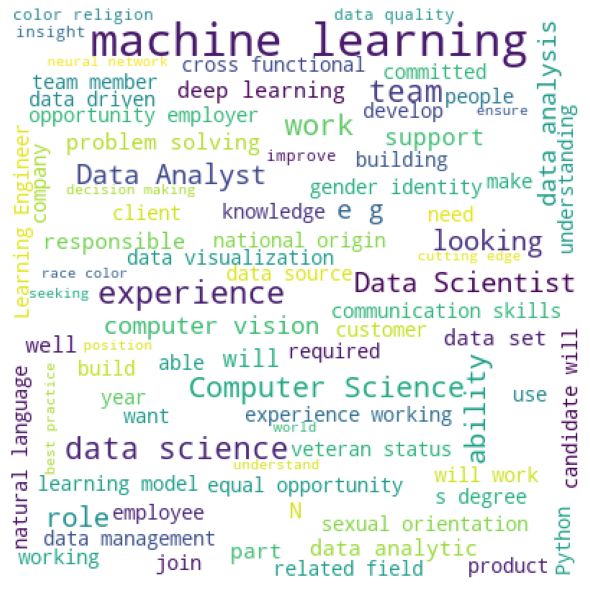

In [50]:
wordcloud = WordCloud(stopwords=set(STOPWORDS),width = 400, height = 400,
                background_color ='white',
                min_font_size = 10).generate(' '.join(df_copy.description.values[:]))
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

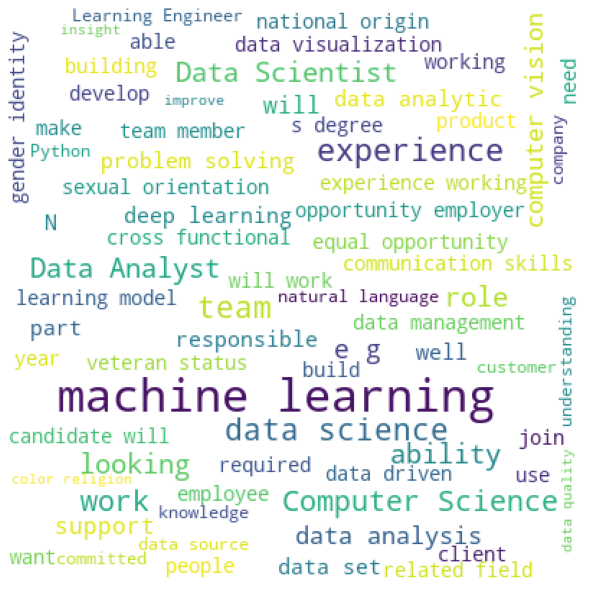

Counter({'and': 153663, 'to': 86410, 'the': 65592, 'of': 58610, 'in': 48060, 'data': 45187, 'a': 45095, 'with': 42013, 'for': 30099, 'or': 21936, 'is': 21420, 'our': 20597, 'we': 17089, 'as': 15944, 'are': 15895, 'experience': 15117, 'on': 14832, 'will': 14666, 'that': 14453, 'you': 14035, 'be': 13273, 'work': 12657, 'learning': 11434, 'an': 10921, 'business': 10499, 'machine': 9916, 'team': 9698, 'from': 8723, 'this': 8598, 'at': 8473, 'by': 7969, 'have': 6947, 'your': 6577, 'new': 5995, 'their': 5973, 'computer': 5919, 'working': 5857, 'all': 5814, 'using': 5483, 'other': 5416, 'skills': 5307, 'such': 5231, 'years': 5198, 'software': 4905, 'analysis': 4823, 'science': 4690, '&': 4663, 'development': 4431, 'models': 4407, 'analytics': 4350, 'ability': 4229, 'including': 4213, 'product': 4196, 'technical': 4170, 'knowledge': 4102, 'company': 4088, 'can': 4076, 'support': 4073, 'not': 3896, 'tools': 3805, 'ai': 3756, 'related': 3752, 'degree': 3732, 'solutions': 3713, 'more': 3709, 'res

In [51]:
# Get the list of all words from the text
words_list = []
for description in df_copy.description.values:
    words_list += description.lower().split()

# Count the frequency of each word
word_counts = Counter(words_list)

# Create WordCloud from the word frequency counts
wordcloud = WordCloud(stopwords=set(STOPWORDS),width = 400, height = 400,
                background_color ='white',
                min_font_size = 10).generate(' '.join(df_copy.description.values[:]))

# Plot the WordCloud image                      
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the WordCloud and the word frequency counts
plt.show()
print(word_counts)


In [52]:
def word_cloud(text, num_words):
    # Convert text to lowercase
    text = text.str.lower()
    # Split text into words
    words = text.str.split()
    # Combine all lists of words into one list
    all_words = [word for word_list in words for word in word_list]
    # Remove stop words
    stopwords = set(STOPWORDS)
    all_words = [word for word in all_words if word not in stopwords]
    # Count the frequency of each word
    word_freq = Counter(all_words)
    # Get the most common words
    most_common = word_freq.most_common(num_words)
    # Create word cloud string
    word_cloud_str = ' '.join([word[0] + f' ({word[1]})' for word in most_common])
    # Return word cloud string
    return word_cloud_str

In [53]:
word_cloud_str = word_cloud(df_copy['description'], 10)
print(word_cloud_str)  # Output: "sample text data analysis"

data (45187) experience (15117) will (14666) work (12657) learning (11434) business (10499) machine (9916) team (9698) new (5995) computer (5919)


In [54]:
df_copy.to_csv("Preprocessed_data.csv", index= False)

In [55]:
dff = pd.read_csv("Preprocessed_data.csv")
dff

,title,company,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
0,machine learning,Neural Magic,Neural Magic is an early-stage AI software com...,onsite,Somerville,usa,19,2,Associate,Full-time,Engineering,"Technology, Information and Internet"
1,machine learning,Neural Magic,Neural Magic is an early-stage AI software com...,onsite,Somerville,usa,8,3,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
2,machine learning,Verneek,Do you want to be part of the core team for bu...,onsite,New York,usa,27,2,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
3,machine learning,Yakoa,We’re looking for people who want to build for...,onsite,San Francisco,usa,11,3,Mid-Senior level,Full-time,Engineering,"Technology, Information and Internet"
4,machine learning,"Chemix, Inc.",Chemix is seeking a highly-motivated graduate-...,onsite,Sunnyvale,usa,9,3,Internship,Internship,Engineering,"Technology, Information and Internet"
...,...,...,...,...,...,...,...,...,...,...,...,...
8230,Natural Language Processing,Cresta,NaN,hybrid,Toronto,canada,23,3,Not Applicable,Not Applicable,Not Applicable,NaN
8231,Natural Language Processing,Cresta,NaN,hybrid,Toronto,canada,23,3,Not Applicable,Not Applicable,Not Applicable,NaN
8232,Natural Language Processing,Cresta,NaN,hybrid,Toronto,canada,23,3,Not Applicable,Not Applicable,Not Applicable,NaN
8233,Natural Language Processing,Cresta,NaN,hybrid,Toronto,canada,23,3,Not Applicable,Not Applicable,Not Applicable,NaN


In [56]:
dff['title'].value_counts()

Data Analyst                   3376
Data Scientist                 2152
machine learning               1575
Natural Language Processing     634
Computer Vision                 498
Name: title, dtype: int64

# get highest 5 values to each job in each country

In [57]:
df_ml_c = dff[(dff['title'] == 'machine learning') & (dff['country'] == 'canada')]
gb2 = df_ml_c.groupby(['company']).count()
gb2 = gb2.reset_index()
gb2 = gb2.sort_values(by= ['description'], ascending= False)
gb2['country'] = 'canada'


df_ml_u = dff[(dff['title'] == 'machine learning') & (dff['country'] == 'usa')]
gb3 = df_ml_u.groupby(['company']).count()
gb3 = gb3.reset_index()
gb3 = gb3.sort_values(by= ['description'], ascending= False)
gb3['country'] = 'usa'

df_ml_a = dff[(dff['title'] == 'machine learning') & (dff['country'] == 'africa')]
gb4 = df_ml_a.groupby(['company']).count()
gb4 = gb4.reset_index()
gb4 = gb4.sort_values(by= ['description'], ascending= False)
gb4['country'] = 'africa'
gb4[:5]

,company,title,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
12,Turing,57,57,57,57,africa,57,57,57,57,57,57
8,Snaphyre,36,33,36,36,africa,36,36,36,36,36,33
0,Capitec,41,28,41,41,africa,41,41,41,41,41,28
10,TechnoServe,19,19,19,19,africa,19,19,19,19,19,19
3,Hugging Face,17,16,17,17,africa,17,17,17,17,17,16


In [58]:
df_ml = pd.concat((gb2[:5], gb3[:5], gb4[:5]), axis = 0)
df_ml['title'] = 'machine learning'
df_ml

,company,title,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
18,Tiger Analytics,machine learning,20,41,41,canada,41,41,41,41,41,20
20,owl.co,machine learning,14,43,43,canada,43,43,43,43,43,14
11,Prenuvo,machine learning,12,27,27,canada,27,27,27,27,27,12
7,NTENT,machine learning,8,14,14,canada,14,14,14,14,14,8
8,Osedea,machine learning,8,16,16,canada,16,16,16,16,16,8
37,Lockheed Martin,machine learning,72,72,72,usa,72,72,72,72,72,72
50,Sapling.ai,machine learning,38,38,38,usa,38,38,38,38,38,38
42,Neural Magic,machine learning,38,38,38,usa,38,38,38,38,38,38
15,Cyberjin,machine learning,38,38,38,usa,38,38,38,38,38,38
40,Meetup,machine learning,32,32,32,usa,32,32,32,32,32,32


In [59]:
df_ds_c = dff[(dff['title'] == 'Data Scientist') & (dff['country'] == 'canada')]
gb2 = df_ds_c.groupby(['company']).count()
gb2 = gb2.reset_index()
gb2 = gb2.sort_values(by= ['description'], ascending= False)
gb2['country'] = 'canada'

df_ds_u = dff[(dff['title'] == 'Data Scientist') & (dff['country'] == 'usa')]
gb3 = df_ds_u.groupby(['company']).count()
gb3 = gb3.reset_index()
gb3 = gb3.sort_values(by= ['description'], ascending= False)
gb3['country'] = 'usa'

df_ds_a = dff[(dff['title'] == 'Data Scientist') & (dff['country'] == 'africa')]
gb4 = df_ds_a.groupby(['company']).count()
gb4 = gb4.reset_index()
gb4 = gb4.sort_values(by= ['description'], ascending= False)
gb4['country'] = 'africa'

gb4[:5]

,company,title,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
15,RPO Recruitment,119,70,119,119,africa,119,119,119,119,119,70
16,Snaphyre,24,23,24,24,africa,24,24,24,24,24,23
7,Hire Resolve .US,34,21,34,34,africa,34,34,34,34,34,21
19,Token Metrics,24,20,24,24,africa,24,24,24,24,24,20
23,ikeja,18,12,18,18,africa,18,18,18,18,18,12


In [60]:
df_ds = pd.concat((gb2[:5], gb3[:5], gb4[:5]), axis = 0)
df_ds['title'] = 'Data Scientist'
df_ds

,company,title,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
14,HP,Data Scientist,24,58,58,canada,58,58,58,58,58,24
3,Binance.US,Data Scientist,16,30,30,canada,30,30,30,30,30,16
11,Experfy,Data Scientist,15,34,34,canada,34,34,34,34,34,15
5,Boosted.ai,Data Scientist,14,17,17,canada,17,17,17,17,17,14
20,ShyftLabs,Data Scientist,13,28,28,canada,28,28,28,28,28,13
26,Experfy,Data Scientist,169,169,169,usa,169,169,169,169,169,169
74,"Technomics, Inc.",Data Scientist,58,59,59,usa,59,59,59,59,59,58
20,Deloitte,Data Scientist,49,52,52,usa,52,52,52,52,52,49
15,Clarifai,Data Scientist,39,40,40,usa,40,40,40,40,40,39
56,Patterned Learning AI,Data Scientist,32,32,32,usa,32,32,32,32,32,32


In [61]:
df_da_c = dff[(dff['title'] == 'Data Analyst') & (dff['country'] == 'canada')]
gb2 = df_da_c.groupby(['company']).count()
gb2 = gb2.reset_index()
gb2 = gb2.sort_values(by= ['description'], ascending= False)
gb2['country'] = 'canada'

df_da_u = dff[(dff['title'] == 'Data Analyst') & (dff['country'] == 'usa')]
gb3 = df_da_u.groupby(['company']).count()
gb3 = gb3.reset_index()
gb3 = gb3.sort_values(by= ['description'], ascending= False)
gb3['country'] = 'usa'

df_da_a = dff[(dff['title'] == 'Data Analyst') & (dff['country'] == 'africa')]
gb4 = df_da_a.groupby(['company']).count()
gb4 = gb4.reset_index()
gb4 = gb4.sort_values(by= ['description'], ascending= False)
gb4['country'] = 'africa'

gb4[:5]

,company,title,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
55,Turing,209,122,209,209,africa,209,209,209,209,209,122
29,M-Power Consulting,38,25,38,38,africa,38,38,38,38,38,25
50,Societe Generale,33,24,33,33,africa,33,33,33,33,33,24
15,FieldPro (By Optimetriks),17,17,17,17,africa,17,17,17,17,17,17
8,Confluence,17,16,17,17,africa,17,17,17,17,17,16


In [62]:
df_da = pd.concat((gb2[:5], gb3[:5], gb4[:5]), axis = 0)
df_da['title'] = 'Data Analyst'
df_da

,company,title,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
1,Affinity,Data Analyst,51,80,80,canada,80,80,80,80,80,51
53,TELUS International,Data Analyst,27,39,39,canada,39,39,39,39,39,27
15,Diverse Lynx,Data Analyst,21,42,42,canada,42,42,42,42,42,21
4,American Iron & Metal (AIM),Data Analyst,19,31,31,canada,31,31,31,31,31,19
24,HiTek Staffing LLC,Data Analyst,15,28,28,canada,28,28,28,28,28,15
49,"Donato Technologies, Inc.",Data Analyst,40,40,40,usa,40,40,40,40,40,40
125,Software People Inc.,Data Analyst,40,40,40,usa,40,40,40,40,40,40
149,Zortech Solutions,Data Analyst,38,38,38,usa,38,38,38,38,38,38
8,Altamira Technologies Corporation,Data Analyst,38,38,38,usa,38,38,38,38,38,38
89,MashPoint - Technology & Staffing,Data Analyst,26,26,26,usa,26,26,26,26,26,26


In [63]:
df_cv_c = dff[(dff['title'] == 'Computer Vision') & (dff['country'] == 'canada')]
gb2 = df_cv_c.groupby(['company']).count()
gb2 = gb2.reset_index()
gb2 = gb2.sort_values(by= ['description'], ascending= False)
gb2['country'] = 'canada'

df_cv_u = dff[(dff['title'] == 'Computer Vision') & (dff['country'] == 'usa')]
gb3 = df_cv_u.groupby(['company']).count()
gb3 = gb3.reset_index()
gb3 = gb3.sort_values(by= ['description'], ascending= False)
gb3['country'] = 'usa'

df_cv_a = dff[(dff['title'] == 'Computer Vision') & (dff['country'] == 'africa')]
gb4 = df_cv_a.groupby(['company']).count()
gb4 = gb4.reset_index()
gb4 = gb4.sort_values(by= ['description'], ascending= False)
gb4['country'] = 'africa'

gb4[:5]

,company,title,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries


In [64]:
df_cv = pd.concat((gb2[:5], gb3[:5], gb4[:5]), axis = 0)
df_cv['title'] = 'Computer Vision'
df_cv

,company,title,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
0,Braintrust,Computer Vision,46,85,85,canada,85,85,85,85,85,46
1,TalentLab,Computer Vision,12,20,20,canada,20,20,20,20,20,12
2,Braintrust,Computer Vision,45,45,45,usa,45,45,45,45,45,45
11,MoTek Technologies,Computer Vision,42,42,42,usa,42,42,42,42,42,42
8,"Koh Young Technology, Inc.",Computer Vision,38,38,38,usa,38,38,38,38,38,38
9,Magnet Forensics,Computer Vision,34,34,34,usa,34,34,34,34,34,34
16,Skyways,Computer Vision,20,20,20,usa,20,20,20,20,20,20


In [65]:
df_nlp_c = dff[(dff['title'] == 'Natural Language Processing') & (dff['country'] == 'canada')]
gb2 = df_nlp_c.groupby(['company']).count()
gb2 = gb2.reset_index()
gb2 = gb2.sort_values(by= ['description'], ascending= False)
gb2['country'] = 'canada'

df_nlp_u = dff[(dff['title'] == 'Natural Language Processing') & (dff['country'] == 'usa')]
gb3 = df_nlp_u.groupby(['company']).count()
gb3 = gb3.reset_index()
gb3 = gb3.sort_values(by= ['description'], ascending= False)
gb3['country'] = 'usa'

df_nlp_a = dff[(dff['title'] == 'Natural Language Processing') & (dff['country'] == 'africa')]
gb4 = df_nlp_a.groupby(['company']).count()
gb4 = gb4.reset_index()
gb4 = gb4.sort_values(by= ['description'], ascending= False)
gb4['country'] = 'africa'

df_nlp = pd.concat((gb2[:5], gb3[:5], gb4[:5]), axis = 0)
df_nlp['title'] = 'Natural Language Processing'
df_nlp

,company,title,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
2,"Huawei Technologies Canada Co., Ltd.",Natural Language Processing,8,20,20,canada,20,20,20,20,20,8
3,Morgan Stanley,Natural Language Processing,4,14,14,canada,14,14,14,14,14,4
0,Behavox,Natural Language Processing,1,17,17,canada,17,17,17,17,17,1
1,Cresta,Natural Language Processing,1,14,14,canada,14,14,14,14,14,1
4,Wysdom.AI,Natural Language Processing,0,17,17,canada,17,17,17,17,17,0
9,Kensho Technologies,Natural Language Processing,77,80,80,usa,80,80,80,80,80,77
6,Dyania Health,Natural Language Processing,59,59,59,usa,59,59,59,59,59,59
11,Laksan Technologies,Natural Language Processing,40,40,40,usa,40,40,40,40,40,40
16,Ninjatech Ai,Natural Language Processing,37,38,38,usa,38,38,38,38,38,37
14,MoTek Technologies,Natural Language Processing,31,31,31,usa,31,31,31,31,31,31


In [66]:
dfall = pd.concat((df_ml, df_ds, df_da, df_cv, df_nlp), axis = 0)
dfall.to_csv("highest companies.csv", index= False)

In [67]:
dfall

,company,title,description,onsite_remote,location,country,day,month,Seniority level,Employment type,Job function,Industries
18,Tiger Analytics,machine learning,20,41,41,canada,41,41,41,41,41,20
20,owl.co,machine learning,14,43,43,canada,43,43,43,43,43,14
11,Prenuvo,machine learning,12,27,27,canada,27,27,27,27,27,12
7,NTENT,machine learning,8,14,14,canada,14,14,14,14,14,8
8,Osedea,machine learning,8,16,16,canada,16,16,16,16,16,8
37,Lockheed Martin,machine learning,72,72,72,usa,72,72,72,72,72,72
50,Sapling.ai,machine learning,38,38,38,usa,38,38,38,38,38,38
42,Neural Magic,machine learning,38,38,38,usa,38,38,38,38,38,38
15,Cyberjin,machine learning,38,38,38,usa,38,38,38,38,38,38
40,Meetup,machine learning,32,32,32,usa,32,32,32,32,32,32
